In [1]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../data/Custom_Products.csv')

In [3]:
data.shape

(69024, 10)

In [5]:
data.head() #Base de datos de productos

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days),Country of origin,Destination
0,13.0,23.0,722.0,407.2073,32.66,17.0,9.5965,5.0,UK,Canada
1,15.0,20.0,721.0,486.5470,39.41,16.0,10.6818,6.0,Arabia Saudi,US
2,14.0,20.0,791.0,401.2436,29.69,17.0,10.9438,8.0,China,Mexico
3,16.0,20.0,711.0,451.0550,46.55,18.0,6.8813,6.0,China,Canada
4,15.0,21.0,785.0,422.6088,39.52,16.0,9.7593,8.0,EU,US


In [6]:
data.describe()

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days)
count,69024.000000,69024.000000,69024.000000,69024.000000,69024.000000,69024.000000,69024.000000,69024.000000
mean,17.573337,20.473227,637.299881,424.568648,44.376721,13.946511,13.915838,7.589780
std,4.165513,5.246875,137.476026,179.615255,28.278442,4.054821,5.413485,2.944708
min,5.000000,5.000000,145.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15.000000,20.000000,582.000000,290.834475,24.030000,11.000000,9.396675,5.000000
50%,17.000000,22.000000,655.000000,400.187600,35.290000,15.000000,12.818950,7.000000
75%,20.000000,24.000000,730.000000,523.748725,52.340000,17.000000,18.791850,10.000000
max,30.000000,30.000000,999.000000,965.371100,146.030000,25.000000,30.000000,15.000000


In [7]:
data.isnull().sum() #Vemos si hay nulos

Height(cm)                0
Width(cm)                 0
size(g)                   0
Price                     0
Customs tax               0
Shiping                   0
Taxes (Without Custom)    0
Avg Arrival Time(days)    0
Country of origin         0
Destination               0
dtype: int64

In [8]:
X=data[['Height(cm)', 'Width(cm)', 'size(g)', 'Price', 'Customs tax', 'Shiping',
       'Taxes (Without Custom)', 'Avg Arrival Time(days)']].copy()
#Como queremos crear grupos lo haremos por productos

In [9]:
X

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days)
0,13.0,23.0,722.0,407.2073,32.66,17.0,9.5965,5.0
1,15.0,20.0,721.0,486.5470,39.41,16.0,10.6818,6.0
2,14.0,20.0,791.0,401.2436,29.69,17.0,10.9438,8.0
3,16.0,20.0,711.0,451.0550,46.55,18.0,6.8813,6.0
4,15.0,21.0,785.0,422.6088,39.52,16.0,9.7593,8.0
...,...,...,...,...,...,...,...,...
69019,10.0,22.0,463.0,679.9889,95.04,9.0,16.2398,6.0
69020,12.0,23.0,385.0,650.3484,119.55,9.0,17.8843,3.0
69021,12.0,25.0,377.0,583.3247,61.27,7.0,15.6244,5.0
69022,8.0,23.0,294.0,642.4097,100.19,9.0,13.0386,4.0


In [10]:
from sklearn.preprocessing import MinMaxScaler #Siempre hay que escalar los datos

In [11]:
sc = MinMaxScaler()

Xs = pd.DataFrame(index = X.index, data = sc.fit_transform(X), columns=X.columns)

In [12]:
Xs

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days)
0,0.32,0.72,0.675644,0.421814,0.223653,0.68,0.319883,0.285714
1,0.40,0.60,0.674473,0.504000,0.269876,0.64,0.356060,0.357143
2,0.36,0.60,0.756440,0.415637,0.203314,0.68,0.364793,0.500000
3,0.44,0.60,0.662763,0.467235,0.318770,0.72,0.229377,0.357143
4,0.40,0.64,0.749415,0.437768,0.270629,0.64,0.325310,0.500000
...,...,...,...,...,...,...,...,...
69019,0.20,0.68,0.372365,0.704381,0.650825,0.36,0.541327,0.357143
69020,0.28,0.72,0.281030,0.673677,0.818667,0.36,0.596143,0.142857
69021,0.28,0.80,0.271663,0.604249,0.419571,0.28,0.520813,0.285714
69022,0.12,0.72,0.174473,0.665454,0.686092,0.36,0.434620,0.214286


2
3
4
5
6
7
8
9


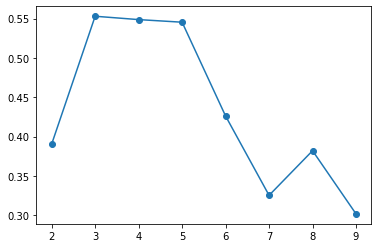

In [13]:
l = []
for k in range(2,10):
    print(k)
    
    km = GaussianMixture(n_components=k,covariance_type='spherical')
    
    km.fit(Xs)
    l.append((k,silhouette_score(Xs,km.predict(Xs))))
silueta = pd.DataFrame(l,columns=['k','silueta'])

plt.plot(silueta['k'],silueta['silueta'],marker='o') #es tardado, iteramos el numero grupos y vemmos su silueta
#covarianxe_type es para evitar problemas de covarianza

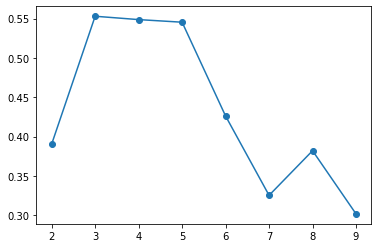

In [14]:
plt.plot(silueta['k'],silueta['silueta'],marker='o') #buscamos una silueta cercana a uno

In [15]:
km.bic(Xs)

-1203388.5810822751

In [16]:
km.aic(Xs)

-1204202.237732153

In [17]:
l_bic = []
l_aic=[]
for k in range(2,10):
    km = GaussianMixture(n_components=k)
    km.fit(Xs.sample(frac=.1))
    l_bic.append((k,km.bic(Xs)))
    l_aic.append((k,km.aic(Xs)))
aic = pd.DataFrame(l_aic,columns=['k','aic'])
bic = pd.DataFrame(l_bic,columns=['k','bic'])

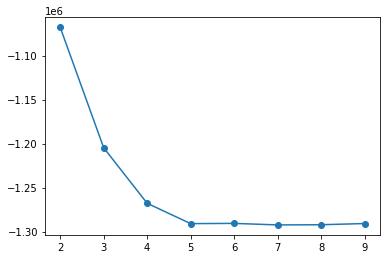

In [18]:
plt.plot(aic['k'],aic['aic'],marker='o') #deben de ser lo mas pequeño posibles

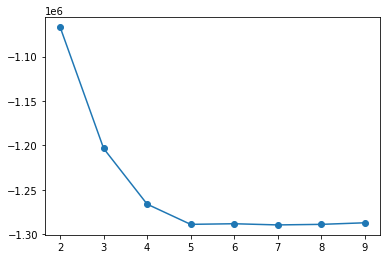

In [19]:
plt.plot(bic['k'],bic['bic'],marker='o')

In [20]:
gmm=GaussianMixture(n_components=5) #como la sileuta esta alta en 5 y es la mejor en bic y aic se toma
#en init_max podemos poner k-means++

In [21]:
gmm.fit(Xs)

GaussianMixture(n_components=5)

In [22]:
len(gmm.means_) #5 medias

5

In [23]:
gmm.means_

array([[0.75354628, 0.24130216, 0.5874292 , 0.38877414, 0.12245399,
        0.51519641, 0.65911511, 0.24716499],
       [0.41456599, 0.65246289, 0.73321019, 0.44236288, 0.26333817,
        0.67268026, 0.29141015, 0.40272863],
       [0.2575681 , 0.75223193, 0.24345723, 0.66291792, 0.66422827,
        0.36870008, 0.53923544, 0.29483181],
       [0.50296939, 0.75439533, 0.58782441, 0.23457183, 0.21188555,
        0.67469695, 0.35758596, 0.76434024],
       [0.5175717 , 0.78082639, 0.49845176, 0.773782  , 0.57412592,
        0.279752  , 0.69687916, 0.55631287]])

In [24]:
len(gmm.covariances_) #5 mmatrices de covarianzas

5

In [25]:
gmm.covariances_

array([[[ 4.79436381e-03,  7.86007235e-06, -3.55199953e-05,
          5.79224298e-05,  8.21084913e-06,  3.77226559e-05,
         -2.79565512e-05,  3.82096215e-05],
        [ 7.86007235e-06,  3.29336446e-03, -1.95557274e-05,
         -1.68113666e-05,  1.33105238e-05,  7.99489051e-06,
         -4.81323370e-05, -8.32032565e-05],
        [-3.55199953e-05, -1.95557274e-05,  4.57435164e-03,
         -2.95059248e-05, -1.70199560e-05, -3.87712836e-05,
          1.72159428e-05,  4.85280884e-05],
        [ 5.79224298e-05, -1.68113666e-05, -2.95059248e-05,
          4.02192578e-03,  1.24038492e-03,  2.21379221e-05,
          2.64692308e-05, -3.81131707e-05],
        [ 8.21084913e-06,  1.33105238e-05, -1.70199560e-05,
          1.24038492e-03,  1.34168465e-03, -9.66681734e-06,
          1.10605152e-05, -2.69645843e-05],
        [ 3.77226559e-05,  7.99489051e-06, -3.87712836e-05,
          2.21379221e-05, -9.66681734e-06,  5.35131143e-03,
          1.00869564e-05, -1.81814004e-05],
        [-2.7956

In [26]:
data['cl'] = gmm.predict(Xs) #Hacemos la prediccion a la prob mas grande

In [27]:
data['cl'].value_counts(1) #Frecuencias de los grupos

1    0.282699
3    0.268197
0    0.213172
2    0.122711
4    0.113221
Name: cl, dtype: float64

In [28]:
"""Tecnicas de proyeccion"""
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE

In [29]:
n_components = 2
pca = PCA(n_components=n_components)
Xp = pd.DataFrame(pca.fit_transform(Xs),columns=[f"p_{i}" for i in  range(1,n_components+1)])
pca.explained_variance_ratio_.cumsum()

array([0.40878221, 0.76044946])

In [30]:
Xp

,p_1,p_2
0,-0.079271,-0.102892
1,-0.041288,-0.015613
2,-0.180080,-0.102543
3,-0.101212,-0.075188
4,-0.124942,-0.131175
...,...,...
69019,0.585839,-0.066768
69020,0.735426,0.037699
69021,0.490326,-0.035520
69022,0.676972,-0.097213


In [31]:
pred_y= gmm.predict(Xs) #Agregamos la columna del cluster

In [32]:
import seaborn as sns

In [33]:
current_palette = sns.color_palette()

/home/jorge/Documents/Diplomado/ambientes/diplo_env/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


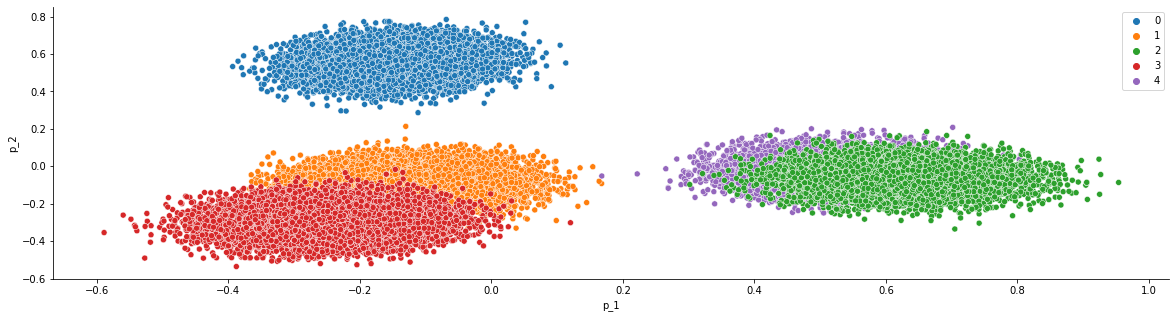

In [34]:
plt.subplots(figsize=(20,5))
sns.scatterplot(Xp["p_1"], Xp["p_2"],hue=pred_y,palette=current_palette[:5])
sns.despine()
plt.show() #Graficamos los grupos, se ve bien

In [35]:
data.groupby(['cl']).mean().style.background_gradient(cmap='Blues')

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days)
cl,,,,,,,,
0,23.838657,11.032554,646.664537,375.311324,17.881956,12.879910,19.773453,4.460310
1,15.364116,21.311587,771.159535,427.043935,38.455249,16.816994,8.742069,6.638190
2,11.439079,23.805785,352.910744,639.961709,96.997282,9.217473,16.177085,5.127627
3,17.574276,23.859875,647.003781,226.448749,30.941652,16.867437,10.727832,11.700789
4,17.939347,24.520665,570.677031,746.985580,83.839736,6.993858,20.906294,8.788356


0---> más impuestos, peso alto, mas pequeños

1---> más pesados, costo de envío mas alto

2---> más altos, impuestos de aduana más bajos, llegan mas rápido (no son envios internacionales)

3---> Costo de envio mas alto, tardan mas en llegar, son los más baratos

4---> más caros, más anchos, mas impuestos en general

In [36]:
data


,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days),Country of origin,Destination,cl
0,13.0,23.0,722.0,407.2073,32.66,17.0,9.5965,5.0,UK,Canada,1
1,15.0,20.0,721.0,486.5470,39.41,16.0,10.6818,6.0,Arabia Saudi,US,1
2,14.0,20.0,791.0,401.2436,29.69,17.0,10.9438,8.0,China,Mexico,1
3,16.0,20.0,711.0,451.0550,46.55,18.0,6.8813,6.0,China,Canada,1
4,15.0,21.0,785.0,422.6088,39.52,16.0,9.7593,8.0,EU,US,1
...,...,...,...,...,...,...,...,...,...,...,...
69019,10.0,22.0,463.0,679.9889,95.04,9.0,16.2398,6.0,China,US,2
69020,12.0,23.0,385.0,650.3484,119.55,9.0,17.8843,3.0,China,US,2
69021,12.0,25.0,377.0,583.3247,61.27,7.0,15.6244,5.0,India,Canada,2
69022,8.0,23.0,294.0,642.4097,100.19,9.0,13.0386,4.0,China,Canada,2


In [ ]:
len(gmm.predict_proba(Xs)[0])#Tenemos un vector de 5 probabilidades

In [ ]:
data[data['cl']==2] #No son pedidos locales

In [37]:
data[data['cl']==0]['Country of origin'].value_counts(1)

China           0.390037
India           0.343482
UK              0.148090
Arabia Saudi    0.055457
Japón           0.036836
EU              0.026098
Name: Country of origin, dtype: float64

In [38]:
data[data['cl']==4]['Country of origin'].value_counts(1)

China           0.403327
India           0.332438
UK              0.143826
Arabia Saudi    0.053231
Japón           0.038516
EU              0.028663
Name: Country of origin, dtype: float64

In [101]:
Xs

,Height(cm),Width(cm),size(g),Price,Customs tax,Shiping,Taxes (Without Custom),Avg Arrival Time(days)
0,0.32,0.72,0.675644,0.421814,0.223653,0.68,0.319883,0.285714
1,0.40,0.60,0.674473,0.504000,0.269876,0.64,0.356060,0.357143
2,0.36,0.60,0.756440,0.415637,0.203314,0.68,0.364793,0.500000
3,0.44,0.60,0.662763,0.467235,0.318770,0.72,0.229377,0.357143
4,0.40,0.64,0.749415,0.437768,0.270629,0.64,0.325310,0.500000
...,...,...,...,...,...,...,...,...
69019,0.20,0.68,0.372365,0.704381,0.650825,0.36,0.541327,0.357143
69020,0.28,0.72,0.281030,0.673677,0.818667,0.36,0.596143,0.142857
69021,0.28,0.80,0.271663,0.604249,0.419571,0.28,0.520813,0.285714
69022,0.12,0.72,0.174473,0.665454,0.686092,0.36,0.434620,0.214286


In [39]:
gmm.predict_proba(Xs)

array([[2.34983940e-30, 1.00000000e+00, 9.14465369e-21, 4.46246146e-28,
        3.27114949e-25],
       [1.49297816e-22, 1.00000000e+00, 8.20758412e-22, 5.83130948e-34,
        1.74967490e-20],
       [3.77154299e-25, 1.00000000e+00, 1.54045500e-28, 2.22554587e-25,
        1.56813920e-24],
       ...,
       [1.23769069e-49, 1.01059425e-19, 9.99999977e-01, 3.14328834e-39,
        2.29336929e-08],
       [1.01298728e-97, 6.03263673e-41, 1.00000000e+00, 4.99922511e-46,
        6.52024349e-22],
       [8.26366179e-77, 2.87967844e-28, 1.00000000e+00, 1.33989777e-29,
        4.16497886e-13]])

In [ ]:
gmm.predict_proba(Xs)[0]

In [ ]:
data.iloc[0] #La asignacion se hace con lo que tenga mas probabilidad

In [103]:
data['cl']

0        4
1        4
2        4
3        4
4        4
        ..
69019    3
69020    3
69021    3
69022    3
69023    3
Name: cl, Length: 69024, dtype: int64